<a href="https://colab.research.google.com/github/jproctor-rebecca/DS/blob/main/module1-Architect/LS_DS_432_TensorFlow_Assignment_RJProctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

In [15]:
# run this code to make sure that your colab noteook is using the GPU
# the gpu isn't strictly necessary for this lesson
# but there are future lessons that will need the accelerated processing of a gpu
# see google colab docs for more details: https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=sXnDmXR7RDr2
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Load Your Data

In [17]:
import numpy as np
import tensorflow as tf 
from sklearn.model_selection import train_test_split

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

print(X.shape)
print(y_train.shape)
print(X.shape)
print(y_train.shape)

(100000, 784)
(80000,)
(100000, 784)
(80000,)


In [18]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

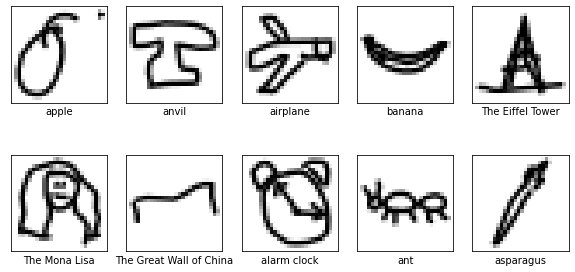

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [20]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [21]:
import tensorflow

from tensorflow import keras
# mnist is a very common data set to use, it's often use as a benchmark dataset 
# i.e. whenever someone comes out with the latest state-of-the-art image classifer a data set like mnist will be used to test the model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
# Dense is the code that handels the full connected forward feeding dynamics of the model that we cover today
# i.e. the passing of the weighted sum values in a vector to all the nodes in the next layer 
from tensorflow.keras.layers import Dense
import numpy as np
# perceptron 
# need 10 neurons in last layer for output 
n_neurons = 10

# docs for sequential: https://keras.io/api/models/sequential/
# instantiate Sequential - builidng a computational graph one layer at a time 
model_adam = Sequential()

model_adam.add(Dense(n_neurons, # number of neurons in this layer 
                input_dim=784, # implict input layer, here we need to specify the dims of the input data
                activation='sigmoid', # specify the activation function
               ))

# Use sparse_categorical_crossentropy
model_adam.compile(optimizer='adam', # TensorFlow: learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08.
              loss='sparse_categorical_crossentropy', 
              metrics='accuracy',
              #validation_split=0.2
              ) 

# Limit model epochs to 30 each fit
model_adam.fit(X,y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 5s 2ms/step - loss: 2.5451 - accuracy: 0.3630
Epoch 2/30
3125/3125 [==============================] - 5s 2ms/step - loss: 2.0866 - accuracy: 0.3750
Epoch 3/30
3125/3125 [==============================] - 6s 2ms/step - loss: 2.0238 - accuracy: 0.3736
Epoch 4/30
3125/3125 [==============================] - 6s 2ms/step - loss: 1.9956 - accuracy: 0.3771
Epoch 5/30
3125/3125 [==============================] - 5s 2ms/step - loss: 1.9487 - accuracy: 0.3754
Epoch 6/30
3125/3125 [==============================] - 5s 2ms/step - loss: 1.9331 - accuracy: 0.3815
Epoch 7/30
3125/3125 [==============================] - 5s 2ms/step - loss: 1.8949 - accuracy: 0.3767
Epoch 8/30
3125/3125 [==============================] - 5s 2ms/step - loss: 1.9163 - accuracy: 0.3902
Epoch 9/30
3125/3125 [==============================] - 5s 2ms/step - loss: 1.8625 - accuracy: 0.3817
Epoch 10/30
3125/3125 [==============================] - 5s 2ms/step - loss: 1.873

In [23]:
# Standardization
max_pixal_value = 255. 
X_train = X_train.astype('float32') / max_pixal_value
X_test = X_test.astype('float32') /max_pixal_value

In [24]:
# We have flatten our 28 x 28 images into a row vectors with 784 features
# 28 * 28 = 784
X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))

print(X_train.shape)
print(X_test.shape)

(80000, 784)
(20000, 784)


In [27]:
model_adam.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [28]:
results_adam = model_adam.fit(X_train, 
                    y_train, 
                    epochs=5, 
                    validation_data=(X_test, y_test))

Epoch 1/5
2500/2500 [==============================] - 6s 2ms/step - loss: 1.4761 - accuracy: 0.6511 - val_loss: 1.2060 - val_accuracy: 0.6643
Epoch 2/5
2500/2500 [==============================] - 6s 2ms/step - loss: 1.1228 - accuracy: 0.6740 - val_loss: 1.0319 - val_accuracy: 0.6910
Epoch 3/5
2500/2500 [==============================] - 6s 2ms/step - loss: 0.9730 - accuracy: 0.7189 - val_loss: 0.9140 - val_accuracy: 0.7461
Epoch 4/5
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8838 - accuracy: 0.7536 - val_loss: 0.8686 - val_accuracy: 0.7583
Epoch 5/5
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8485 - accuracy: 0.7604 - val_loss: 0.8465 - val_accuracy: 0.7629


### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [29]:
results_adam.history

{'accuracy': [0.6510624885559082,
  0.6740249991416931,
  0.7188875079154968,
  0.7535874843597412,
  0.7603750228881836],
 'loss': [1.476093053817749,
  1.1228359937667847,
  0.9729808568954468,
  0.8837823271751404,
  0.8484882116317749],
 'val_accuracy': [0.6643499732017517,
  0.6909999847412109,
  0.7461000084877014,
  0.7583000063896179,
  0.7628999948501587],
 'val_loss': [1.2060232162475586,
  1.0319055318832397,
  0.9140123128890991,
  0.8685530424118042,
  0.846451461315155]}

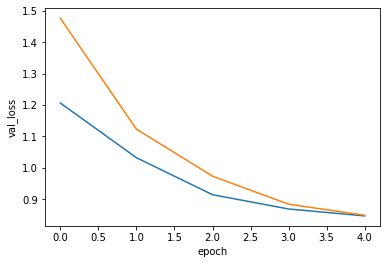

In [31]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(results_adam.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

In [ ]:
# we should stop at 4 epochs - convergence of validation loss and accuracy loss


## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [ ]:
# Stochastic gradient descent

# need 10 neurons in last layer for output 
n_neurons = 10

# docs for sequential: https://keras.io/api/models/sequential/
# instantiate Sequential - builidng a computational graph one layer at a time 
model_sgd = Sequential()

model_sgd.add(Dense(n_neurons, # number of neurons in this layer 
                input_dim=784, # implict input layer, here we need to specify the dims of the input data
                activation='sigmoid', # specify the activation function
               ))

# Use sparse_categorical_crossentropy
model_sgd.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics='accuracy',
              #validation_split=0.2
              ) 

# Limit model epochs to 30 each fit
model_sgd.fit(X,y, epochs=30)


In [ ]:
# Standardization
max_pixal_value = 255. 
X_train = X_train.astype('float32') / max_pixal_value
X_test = X_test.astype('float32') /max_pixal_value

In [ ]:
# We have flatten our 28 x 28 images into a row vectors with 784 features
# 28 * 28 = 784
X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))

print(X_train.shape)
print(X_test.shape)

In [ ]:
model_sgd.summary()

In [ ]:
results_sgd = model_adam.fit(X_train, 
                    y_train, 
                    epochs=5, 
                    validation_data=(X_test, y_test))

In [ ]:
results_sgd.history

In [ ]:
df = pd.DataFrame.from_records(results_sgd.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

In [ ]:
# we should stop at __ epochs - convergence of validation loss and accuracy loss

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 

Sigmoid — This results in a value between 0 and 1 which we can infer to be how confident the model is of the example being in the class

2. What is the difference between a loss function and a metric? Why might we need both in Keras? 

The loss function is used to optimize your model. This is the function that will get minimized by the optimizer. A metric is used to judge the performance of your model.

3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

Stochastic Gradient Descent is an improved version of batch gradient descent. Instead of computing the gradients over the entire dataset, it performs a parameter update for each example in the dataset. The problem of SGD is that the updates are frequent and with a high variance, so the objective function heavily fluctuates during training. The problem of SGD is that the updates are frequent and with a high variance, so the objective function heavily fluctuates during training.

Adam adds to the advantages of Adadelta and RMSprop, the storing of an exponentially decaying average of past gradients similar to momentum. Adam is the best among the adaptive optimizers in most of the cases. It is good with sparse data: the adaptive learning rate is perfect for this type of datasets.
There is no need to focus on the learning rate value.

Adam is the best choice in general. Anyway, many recent papers state that SGD can bring to better results if combined with a good learning rate annealing schedule which aims to manage its value during the training.
First try Adam in any case, because it is more likely to return good results without an advanced fine tuning. Then, if Adam achieves good results, it could be a good idea to switch on SGD to see what happens.

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)